In [1]:
# import os
import sys
import importlib
sys.path.append("/tmp/pycharm_project_568/Classification/")
# # from dataset_tool.dataset_loader import *
# import importer
# from dataset_tool.dataset_loader import *
import dataset_tool.dataset_loader
importlib.reload(dataset_tool.dataset_loader)

<module 'dataset_tool.dataset_loader' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_loader.py'>

In [2]:
dataset = dataset_tool.dataset_loader.load_dataset5()

test
Shape of array is (7242,)
COnfig path /tmp/pycharm_project_568/Classification/dataset_config
to_learch water,forest,field,city
Processing water
Size of water is 155000
Processing forest
Size of forest is 456100
Processing field
Size of field is 837600
Processing city
Size of city is 307500
Train size: 1404960. Test size: 351240


In [3]:
from dataset_tool.dataset_tree_transformer import *
importlib.reload(dataset_tool.dataset_tree_transformer)


<module 'dataset_tool.dataset_tree_transformer' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_tree_transformer.py'>

In [4]:
dataset_tree = DatasetTreeAdapter(dataset)

COnfig path /tmp/pycharm_project_568/Classification/dataset_config
categories tree string ["water",["forest",["field","city"]]]
List array ['water', ['forest', ['field', 'city']]].
Creating dataset: train len: 1404960 test len: 351240
Creating dataset: train len: 1280962 test len: 320238
Creating dataset: train len: 916244 test len: 228856


In [5]:
dataset_tree.dataset_tree

In [6]:
#importlib.reload(dataset_tool.KNNClassifier)
from dataset_tool.KNNClassifier import *





In [7]:
knn_classifier = KNNClassifier(dataset_tree.dataset_tree)

In [8]:
knn_classifier.fit()

Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]


In [9]:
knn_classifier.predict_test()

Start prediction test data:
Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]
Working with: idx 0 and shape (351240, 12)...
Working with: idx 1 and shape (320238, 12)...
Working with: idx 2 and shape (228856, 12)...


In [10]:
import cuml
type(knn_classifier.models[0]) == cuml.internals.base_helpers.BaseMetaClass

False

In [11]:
from dataset_tool.classification_report_creator import *

In [12]:
knn_report_creator = ClassificationReportCreator(knn_classifier.predictions,dataset_tree.dataset_tree)

In [13]:
knn_report_creator.display_tree_predictions()

Get accureacy for 0 iteration
Accureacy 0.9985365867614746
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     30800
           2       1.00      1.00      1.00    320440

    accuracy                           1.00    351240
   macro avg       0.99      1.00      1.00    351240
weighted avg       1.00      1.00      1.00    351240

Get accureacy for 1 iteration
Accureacy 0.9669808149337769
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     91112
           2       0.98      0.98      0.98    229126

    accuracy                           0.97    320238
   macro avg       0.96      0.96      0.96    320238
weighted avg       0.97      0.97      0.97    320238

Get accureacy for 2 iteration
Accureacy 0.9960280656814575
              precision    recall  f1-score   support

           1       1.00      0.99      1.00    168023
           2       0.99      1.00      0.99     60833

    a

In [14]:
import numpy as np
arrr = np.asarray([1,2,3,4,5,6])

In [15]:
np.delete(arrr,[0,3,5])

array([2, 3, 5])

In [16]:
from dataset_tool.real_prediction import *
#importlib.reload(dataset_tool.real_prediction)

In [17]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [18]:
real_prediction_knn = RealPrediction("/tmp/shared/dataset4/2", knn_classifier.models)

In [19]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [20]:
real_prediction_knn.predict()

In [21]:
real_prediction_knn

In [22]:
real_prediction_knn.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (422342,)
Predcition: 1. Len of idxs: 216805. New array shape: (639147,)
Predcition: 0. Len of idxs: 58825. New array shape: (697972,)


In [23]:
im = real_prediction_knn.to2d()

In [24]:
real_prediction_knn.height

638

In [25]:
# arr1 = np.asarray([1,2,3])
# arr1_idx = np.asarray([2,4,5])
# arr2 = np.asarray([11,22,33,44,55,66,77,88])
# shapes = arr1.shape[0]+arr2.shape[0]
# arr3 = np.empty(shapes, dtype=float)
# arr3[arr1_idx] = arr1
# arr3[~np.isin(np.arange(arr3.shape[0]), arr1_idx)] = arr2
# arr3

In [26]:
predictions = real_prediction_knn.predictions

In [27]:
len(predictions[2][0])

0

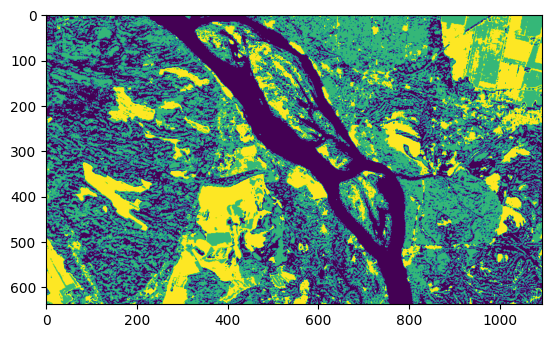

In [28]:
import matplotlib.pyplot as plt

plt.imshow(im)

In [29]:
real_prediction_knn.predict_proba()

In [32]:
real_prediction_knn.flatten_proba()

Predcition: 2. Len of idxs: 0. New array shape: (422342,)


ValueError: shape mismatch: value array of shape (422342,2) could not be broadcast to indexing result of shape (422342,)

In [30]:
real_prediction_knn.predictions[0][1][0]

1

In [31]:
real_prediction_knn.predictions_proba[0][1]

array([[1.0000001, 0.       ],
       [1.0000001, 0.       ],
       [1.0000001, 0.       ],
       ...,
       [0.       , 1.0000001],
       [0.       , 1.0000001],
       [0.       , 1.0000001]], dtype=float32)

In [31]:
# def flatten_proba(self):
#     array = np.empty(0)
#     for index, item in reversed(list(enumerate(self.predictions_proba))):
#         new_array = np.empty((array.shape[0] + item[1].shape[0],2), dtype=float)
#         print(f"Predcition: {item[2]}. Len of idxs: {len(item[0])}. New array shape: {new_array.shape}")
#         new_items = item[1] + item[2]
#         if len(item[0]) == 0:
#             new_array[np.arange(item[1].shape[0])] = new_items
#         else:
#             new_array[item[0]] = item[1]
#             new_array[~np.isin(np.arange(array.shape[0] + item[1].shape[0]), item[0])] = array
#         array = new_array
#     self.predictions_composite_proba = array